In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir='.', untar = True)

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


In [5]:
data_dir


'./datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


PosixPath('datasets/flower_photos')

In [8]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg')

In [9]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [11]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


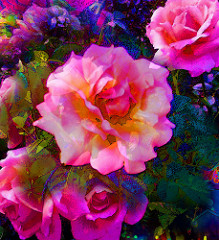

In [12]:
roses = list(data_dir.glob('roses/*'))
roses[:5]
PIL.Image.open(str(roses[7]))

In [13]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

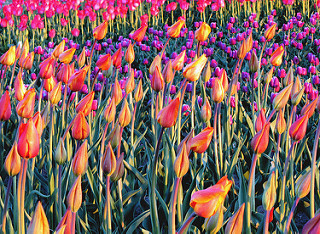

In [14]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))


In [15]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))    
}

In [16]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [17]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4   
}

In [18]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [19]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg')

In [20]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [21]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
print(img)
print('\n',img.shape)

[[[ 14   3   0]
  [  1   0   2]
  [  0   0   6]
  ...
  [244 245 243]
  [244 245 243]
  [244 245 243]]

 [[  0   0   9]
  [  0   0   4]
  [  4   7   5]
  ...
  [243 244 242]
  [243 244 242]
  [243 244 242]]

 [[  3  57 164]
  [ 30  63 132]
  [  0   0  19]
  ...
  [244 245 243]
  [244 245 243]
  [244 245 243]]

 ...

 [[140 105  85]
  [146 112  89]
  [147 113  90]
  ...
  [155 125  96]
  [152 122  93]
  [148 118  89]]

 [[148 114  91]
  [152 118  95]
  [150 116  93]
  ...
  [154 124  95]
  [152 122  93]
  [150 120  93]]

 [[153 119  96]
  [154 120  97]
  [149 115  91]
  ...
  [151 122  95]
  [153 123  94]
  [151 121  94]]]

 (243, 500, 3)


In [22]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))


In [23]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [24]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [25]:
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])



In [26]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [27]:
y[:5]

[0, 0, 0, 0, 0]

In [28]:
X[0]

array([[[  2,   0,   2],
        [ 10,   5,   1],
        [ 89,  85,  97],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[ 14,  33,  73],
        [  6,   1,   2],
        [ 92,  90, 105],
        ...,
        [243, 244, 242],
        [244, 245, 243],
        [243, 244, 242]],

       [[122, 176, 224],
        [ 10,   1,   2],
        [ 72,  80,  84],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[147, 109,  85],
        [145, 109,  85],
        [144, 108,  84],
        ...,
        [155, 122,  96],
        [152, 121,  95],
        [149, 118,  93]],

       [[148, 114,  91],
        [154, 120,  96],
        [146, 112,  88],
        ...,
        [155, 125,  98],
        [153, 121,  95],
        [152, 122,  93]],

       [[153, 119,  96],
        [151, 117,  93],
        [152, 117,  94],
        ...,
        [154, 124,  97],
        [153, 121,  95],
        [153, 123,  94]]

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
0

0

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [32]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [33]:
model = Sequential()